In [ ]:
## Author Vincent Butti 11 November 2020

## SUMMARY

#1 entry level visual analysis of BTC-USD crypto currency

#2 plotting data with mpl finance modules

#3 decomposing monthly, weekly, daily trends

#4 checking stationarity of the data

#5 different models to get predictions

In [9]:
# saving and loading tools
import pickle

# data manipulation tools
import pandas as pd
import numpy as np

import warnings
# Ignore the warning, can comment this 
warnings.filterwarnings("ignore")




# dataviz tools
import mplfinance as mpf
mpf.__version__
import matplotlib
import matplotlib.pyplot as plt
from pylab import rcParams

# statistiscal tools
import statsmodels.api as sm
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from statsmodels.tsa.stattools import adfuller

#dashboard generating tool
from pandas_profiling import ProfileReport

#other
import itertools


In [10]:
## loading data
path_data = "C:/PROJET/CRYPTO/data/"

In [11]:
with open("C:/PROJET/CRYPTO/data/yahoo_finance/10_best_crypto_pickle", "rb") as f:
    df_multidx = pickle.load(f)

In [12]:
with open("C:/PROJET/CRYPTO/data/yahoo_finance/pickle_dict_crypto_stocks", "rb") as f:
    df_dict = pickle.load(f)

In [ ]:
df_dict.keys()

In [ ]:
df_multidx.columns.get_level_values(0)

In [ ]:
df_multidx.columns.get_level_values(1)

## # 1 entry level  analysis of BTC-USD crypto currency

mplfinance library : 
https://github.com/matplotlib/mplfinance/tree/master/examples

In [13]:
btc= df_dict["BTC-USD"]

In [14]:
btc.describe()

,Adj Close,Close,High,Low,Open,Volume
count,2244.000000,2244.000000,2244.000000,2244.000000,2244.000000,2.244000e+03
mean,4572.468210,4572.468210,4679.945558,4446.360334,4566.126155,8.396161e+09
std,4246.197518,4246.197518,4360.873761,4106.990729,4241.474108,1.198977e+10
min,178.102997,178.102997,211.731003,171.509995,176.897003,5.914570e+06
25%,437.735237,437.735237,444.679001,431.383743,437.788002,6.084958e+07
50%,3749.972778,3749.972778,3874.512207,3652.723877,3744.454224,2.434895e+09
75%,8198.427002,8198.427002,8312.233398,7960.618652,8195.106689,1.414433e+10
max,19497.400391,19497.400391,20089.000000,18974.099609,19475.800781,7.415677e+10


In [17]:
# generate a profile report covering a lot of visual data analysis
profile = btc.profile_report(title = "BTC-USD", explorative=True)
profile.to_widgets()

## # 2 plotting with mpl finance modules

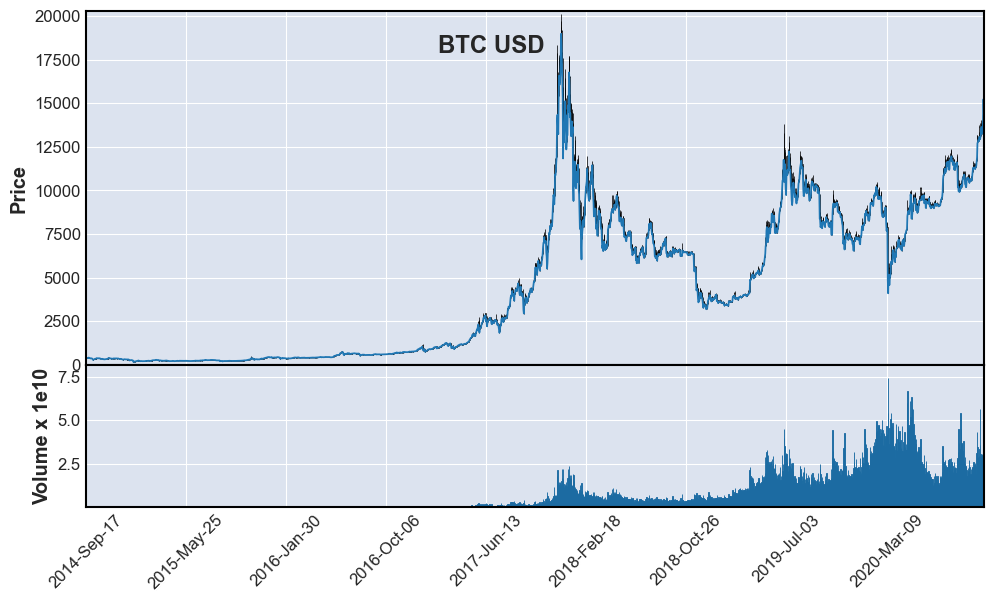

In [18]:




apdict0 = mpf.make_addplot(btc["High"])
apdict1 = mpf.make_addplot(btc["Low"])
mpf.plot(btc,addplot= apdict1 , figratio=(18,10), tight_layout=True, volume=True, title ="BTC USD",
        ##savefig=path_data + 'btc-usd.png',
        )

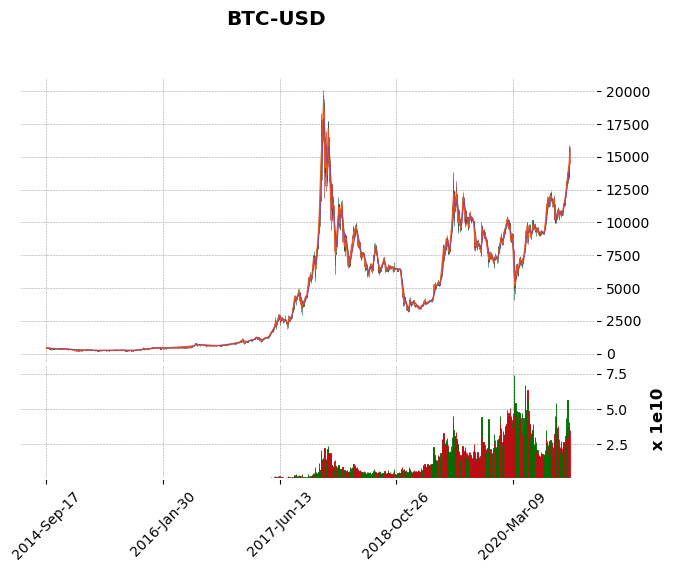

In [19]:
mpf.plot(btc, type='candle', style='charles',
        title='BTC-USD',
        ylabel='',
        ylabel_lower='',
        volume=True, 
        mav=(3,6,9), 
        #savefig='test-mplfiance.png',
        )

In [20]:
%%capture
fig = mpf.figure(style='yahoo',figsize=(10,15),)
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

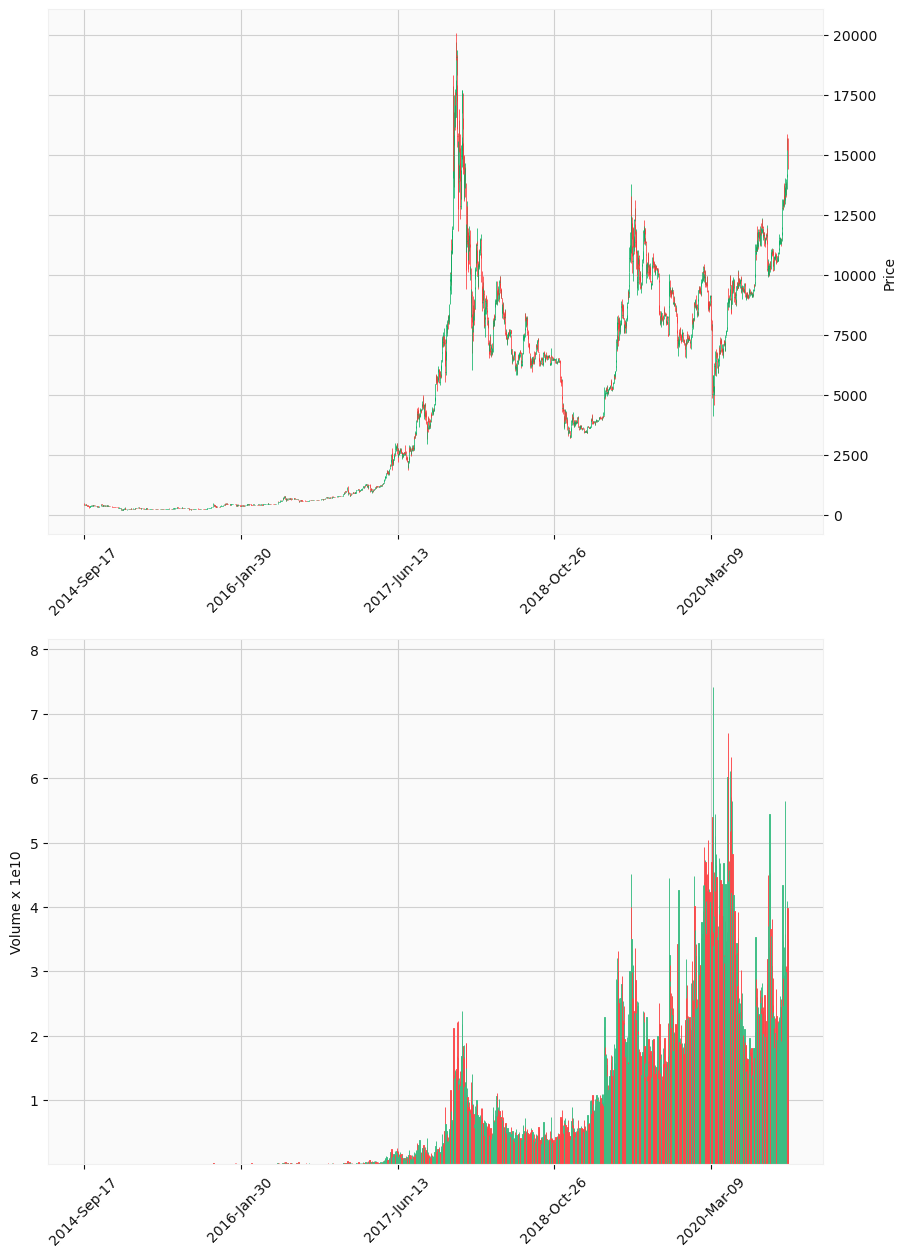

In [21]:
mpf.plot(btc,ax=ax1,volume=ax2,)
fig

## #4 decomposing monthly, weekly, daily trends

An End-to-End Project on Time Series Analysis and Forecasting with Python
https://towardsdatascience.com/an-end-to-end-project-on-time-series-analysis-and-forecasting-with-python-4835e6bf050b

In [22]:
btc.columns

Index(['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

In [23]:
# resample Cloising price by monthly
day = btc['Close']
month = btc['Close'].resample('MS').mean()
week = btc['Close'].resample('W-MON').mean()

BTC EUR with monthy interval mean


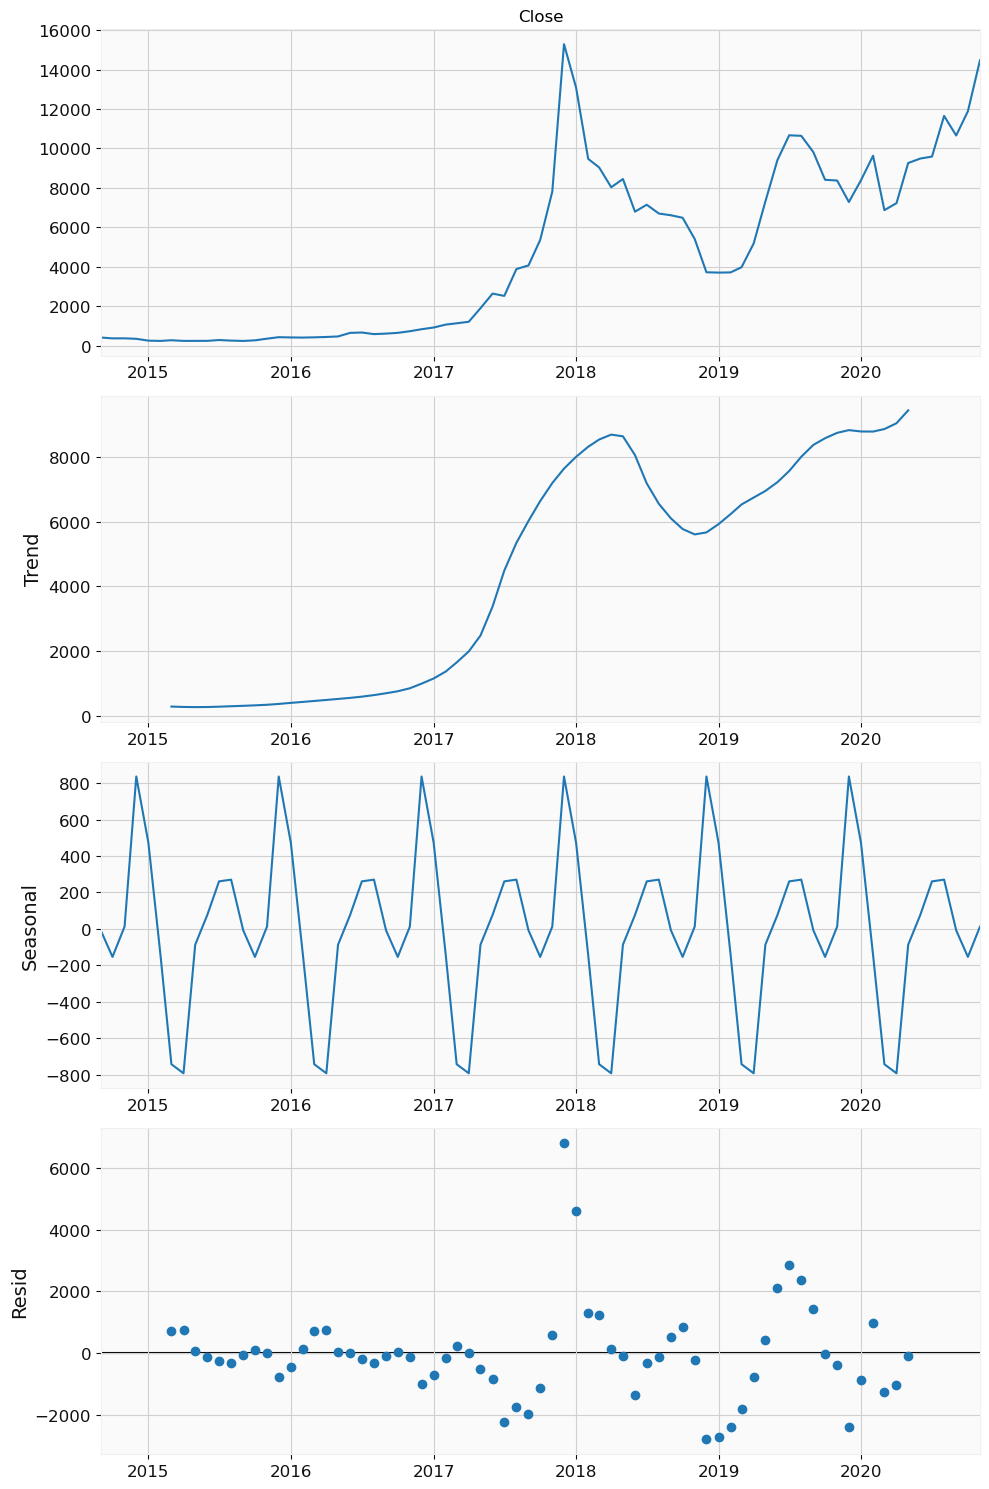

In [24]:
import matplotlib 
import matplotlib.pyplot as plt
## further time serie anlysisimport matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'


rcParams['figure.figsize'] = 10,15
decomposition = sm.tsa.seasonal_decompose( btc['Close'].resample('MS').mean(), model='additive') #resampling by mean of month values
fig = decomposition.plot()
print("BTC EUR with monthy interval mean")
plt.show()



BTC EUR with weekly interval mean


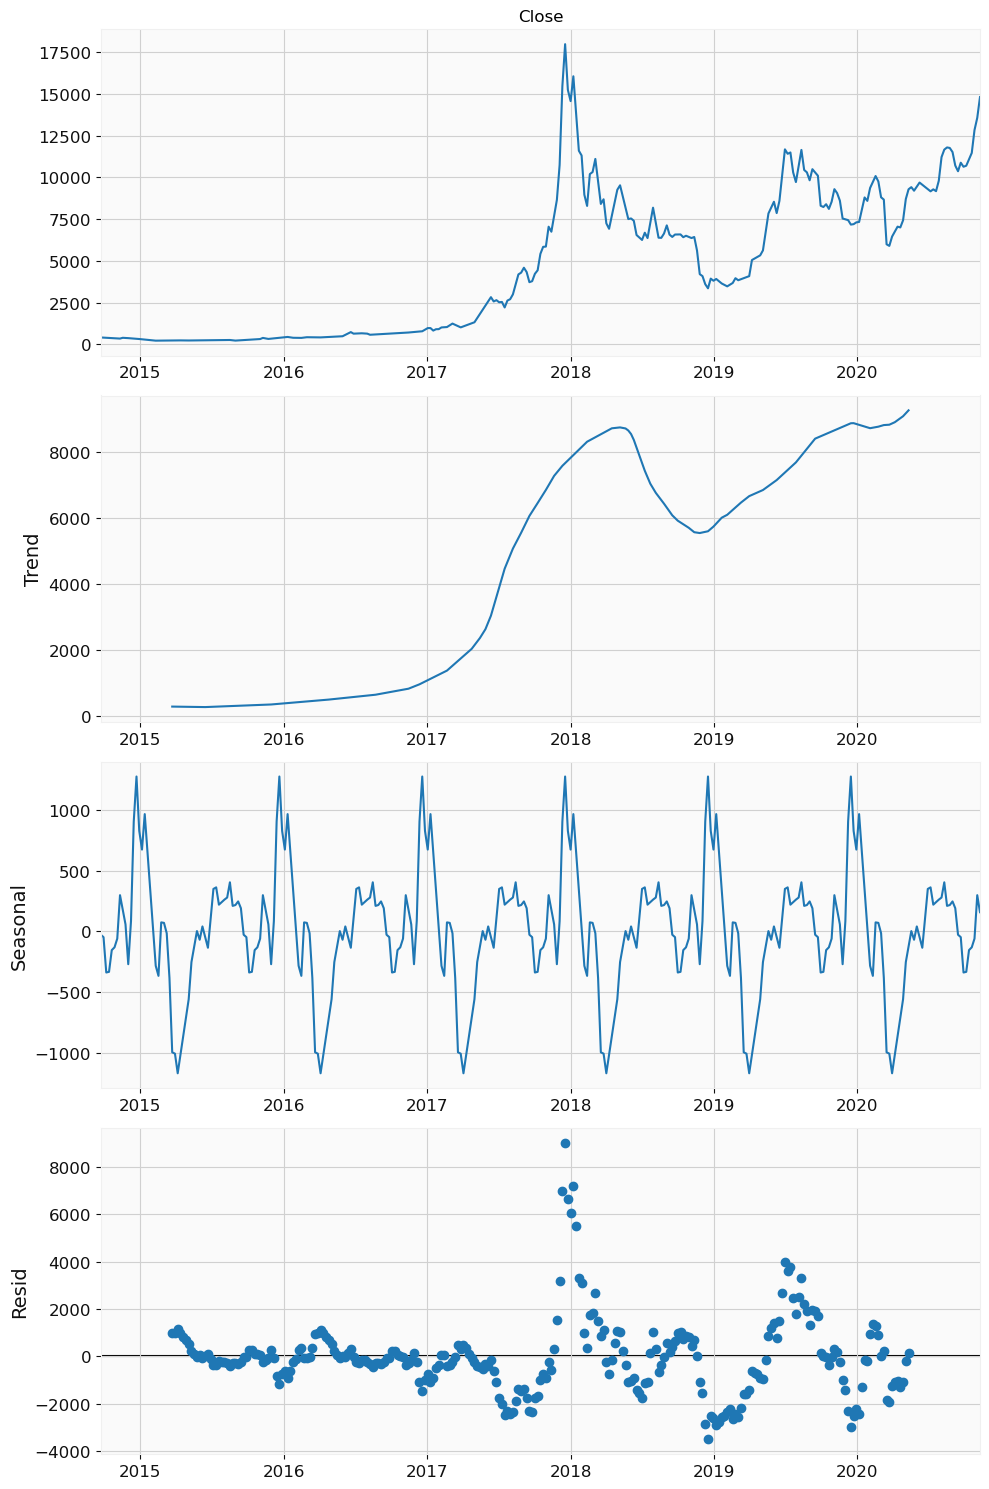

In [25]:
rcParams['figure.figsize'] = 10,15
decomposition = sm.tsa.seasonal_decompose(btc['Close'].resample('W-MON').mean(), model='additive') #resampling by mean of weekly  values
fig = decomposition.plot()
print("BTC EUR with weekly interval mean")
plt.show()


BTC EUR with daily interval


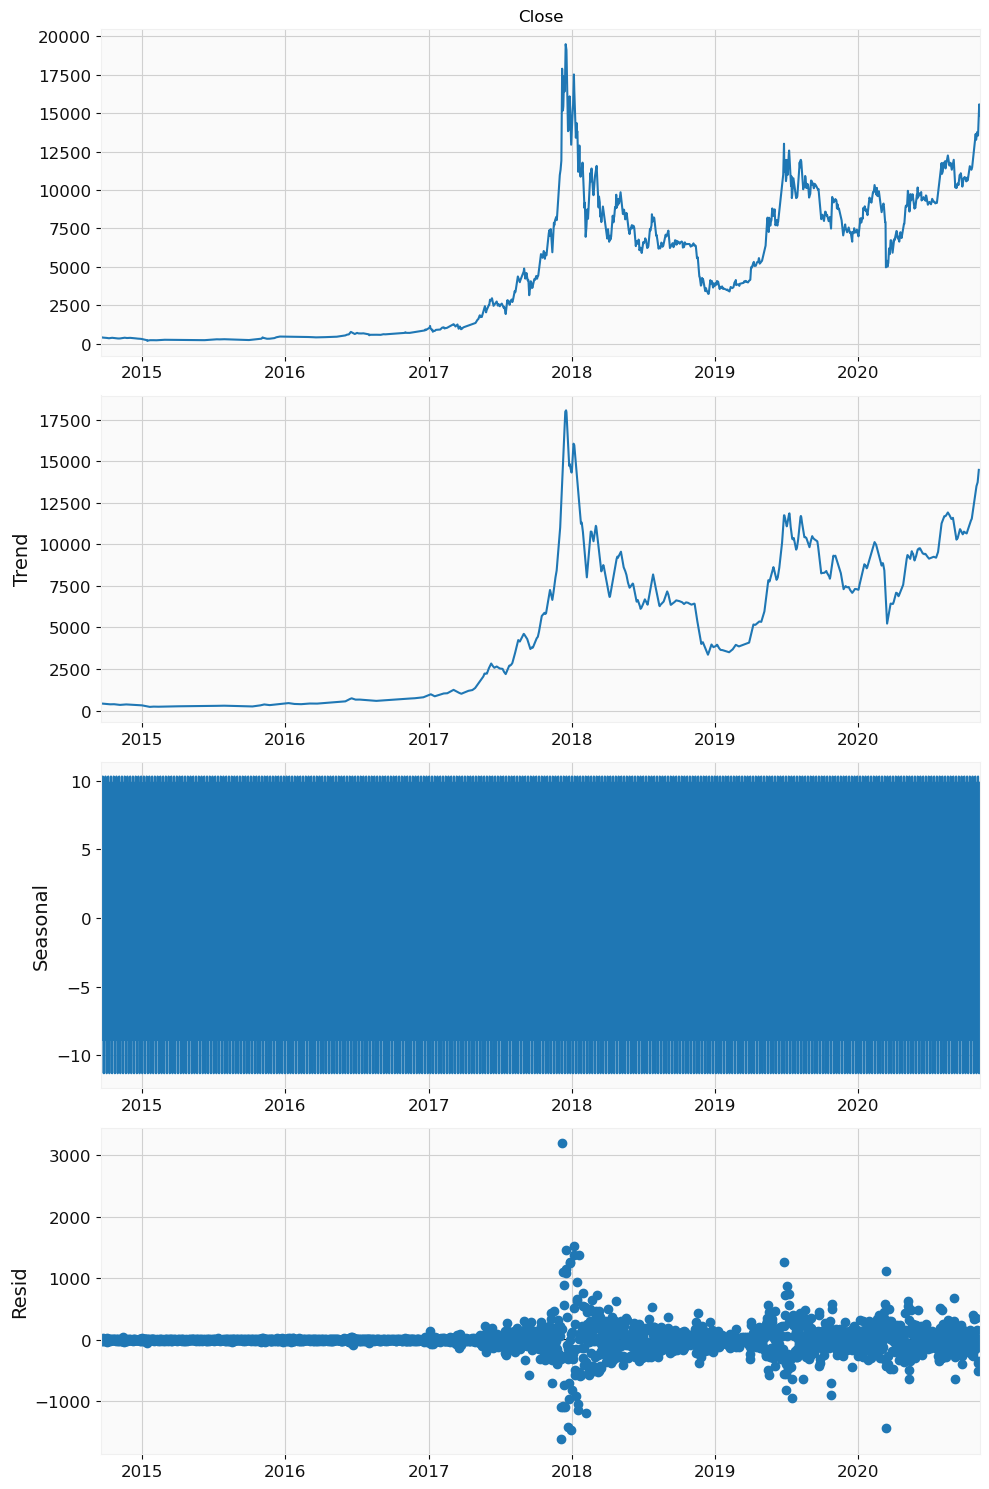

In [26]:
rcParams['figure.figsize'] = 10,15
decomposition = sm.tsa.seasonal_decompose(btc['Close'], model='additive')
fig = decomposition.plot()
print("BTC EUR with daily interval")
plt.show()

In [27]:
y = btc["Open"].copy()
y

Date
2014-09-17      465.864014
2014-09-18      456.859985
2014-09-19      424.102997
2014-09-20      394.673004
2014-09-21      408.084991
                  ...     
2020-11-03    13550.451172
2020-11-04    13950.488281
2020-11-05    14133.733398
2020-11-06    15579.729492
2020-11-07    15565.880859
Freq: D, Name: Open, Length: 2244, dtype: float64

## # 4 CHECKING STATIONARITY OF THE DATA 

https://www.analyticsvidhya.com/blog/2018/09/non-stationary-time-series-python/

## ADF (Augmented Dickey Fuller) Test

In [30]:

#define function for ADF test
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

#apply adf test on the series
adf_test(btc.Close)

Results of Dickey-Fuller Test:
Test Statistic                  -0.98613654
p-value                          0.75828704
#Lags Used                      27.00000000
Number of Observations Used   2216.00000000
Critical Value (1%)             -3.43330437
Critical Value (5%)             -2.86284515
Critical Value (10%)            -2.56746480
dtype: float64


Test for stationarity: If the test statistic is less than the critical value, we can reject the null hypothesis (aka the series is stationary). When the test statistic is greater than the critical value, we fail to reject the null hypothesis (which means the series is not stationary).

##  KPSS (Kwiatkowski-Phillips-Schmidt-Shin) Test

In [31]:
#define function for kpss test
from statsmodels.tsa.stattools import kpss
#define KPSS
def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)
kpss_test(btc.Close)

Results of KPSS Test:
Test Statistic           5.92392792
p-value                  0.01000000
Lags Used               27.00000000
Critical Value (10%)     0.34700000
Critical Value (5%)      0.46300000
Critical Value (2.5%)    0.57400000
Critical Value (1%)      0.73900000
dtype: float64


Test for stationarity: If the test statistic is greater than the critical value, we reject the null hypothesis (series is not stationary). If the test statistic is less than the critical value, if fail to reject the null hypothesis (series is stationary). For the air passenger data, the value of the test statistic is greater than the critical value at all confidence intervals, and hence we can say that the series is not stationary.

In [32]:
## making the data staionary

In [33]:
btc

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2014-09-17,457.33401489,457.33401489,468.17401123,452.42199707,465.86401367,21056800
2014-09-18,424.44000244,424.44000244,456.85998535,413.10400391,456.85998535,34483200
2014-09-19,394.79598999,394.79598999,427.83499146,384.53201294,424.10299683,37919700
2014-09-20,408.90399170,408.90399170,423.29598999,389.88299561,394.67300415,36863600
2014-09-21,398.82101440,398.82101440,412.42599487,393.18099976,408.08499146,26580100
...,...,...,...,...,...,...
2020-11-03,13950.30078125,13950.30078125,13984.98144531,13325.44140625,13550.45117188,29869951617
2020-11-04,14133.70703125,14133.70703125,14218.76660156,13580.47167969,13950.48828125,35116364961
2020-11-05,15579.84863281,15579.84863281,15706.40429688,14102.08886719,14133.73339844,40856321438


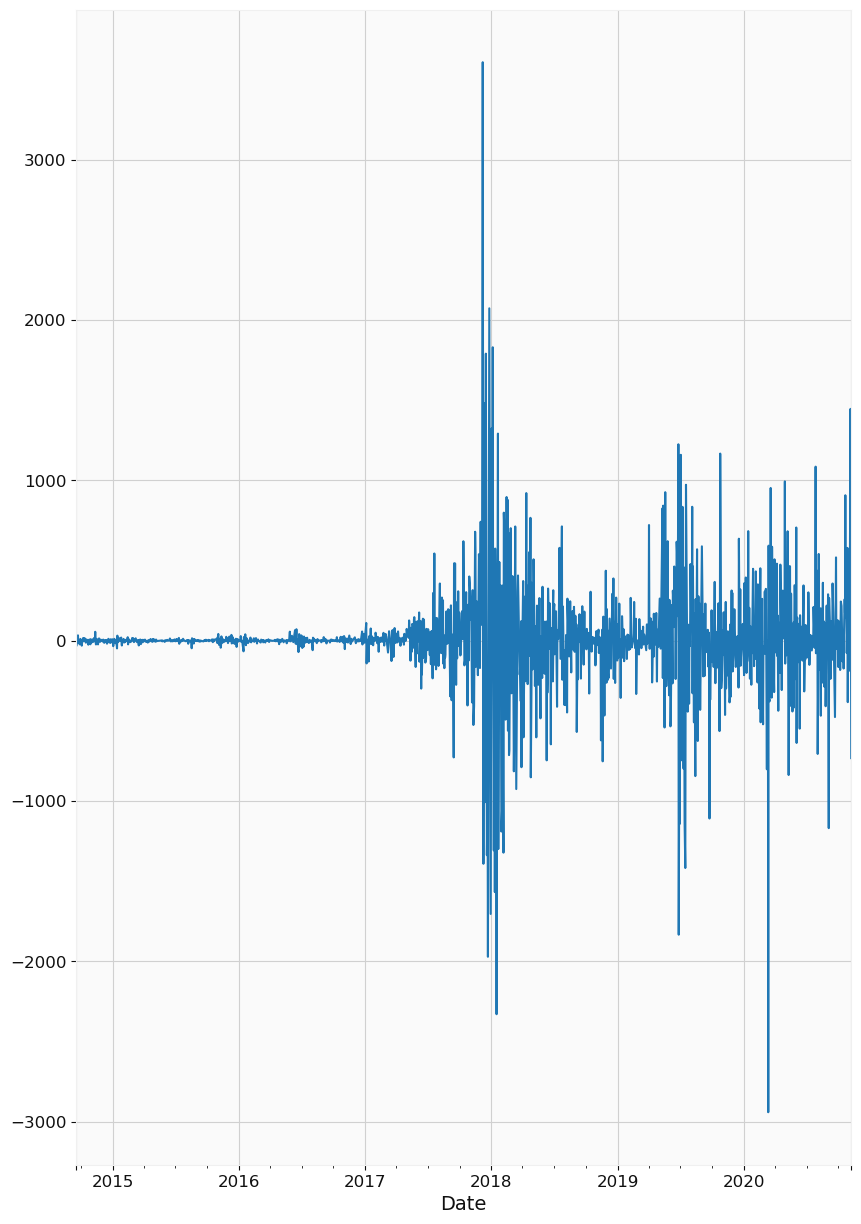

In [34]:
btc['Close_diff'] = btc['Close'] - btc['Close'].shift(1)
btc['Close_diff'].dropna().plot()

In [35]:
n=7
btc['Close_diff'] = btc['Close'] - btc['Close'].shift(n)

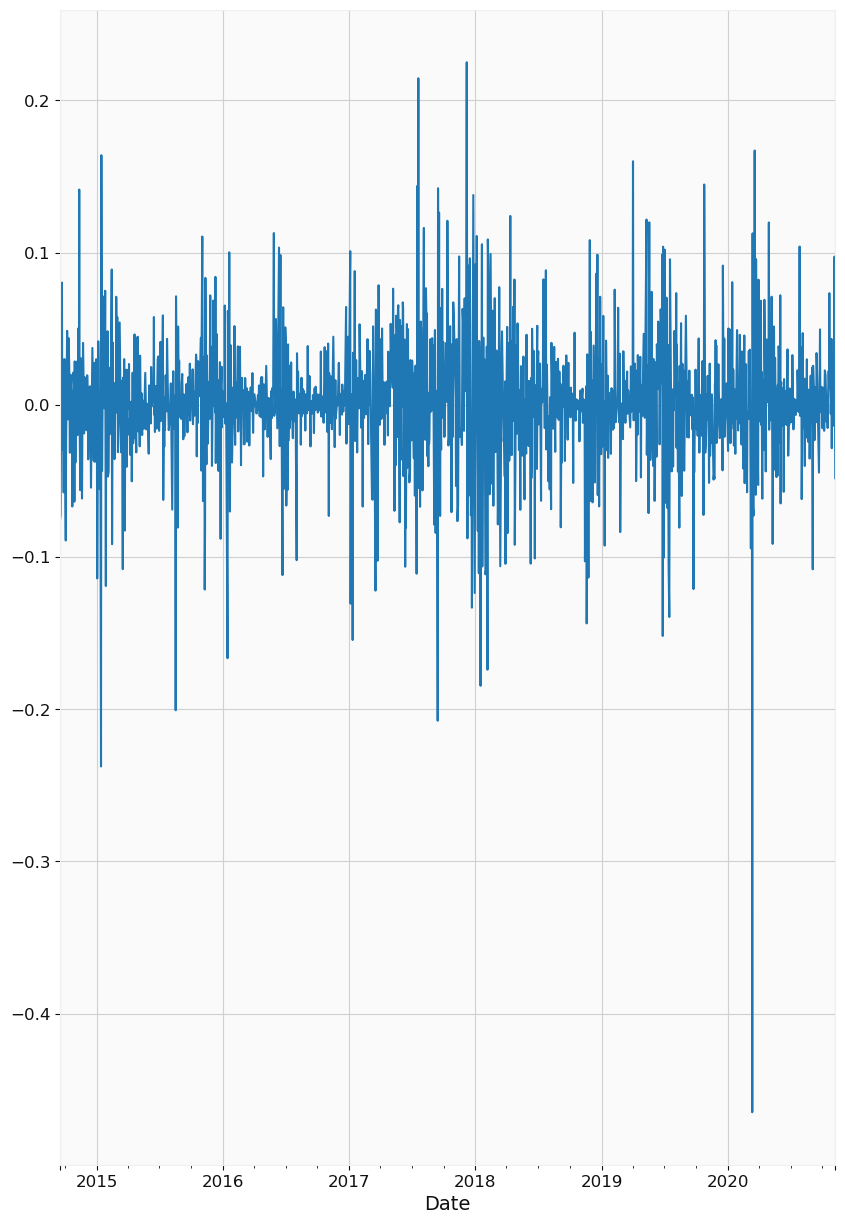

In [36]:
btc['Close_log'] = np.log(btc['Close'])
btc['Close_log_diff'] = btc['Close_log'] - btc['Close_log'].shift(1)
btc['Close_log_diff'].dropna().plot()

In [ ]:
#saving our dataframe
btc.to_csv(path_data + "BTCUSD_stationary.csv")

In [37]:
### plot for Rolling Statistic for testing Stationarity
def test_stationarity(timeseries, title):
    
    #Determing rolling statistics
    rolmean = pd.Series(timeseries).rolling(window=12).mean() 
    rolstd = pd.Series(timeseries).rolling(window=12).std()
    
    fig, ax = plt.subplots(figsize=(16, 4))
    ax.plot(timeseries, label= title)
    ax.plot(rolmean, label='rolling mean');
    ax.plot(rolstd, label='rolling std (x10)');
    ax.legend()

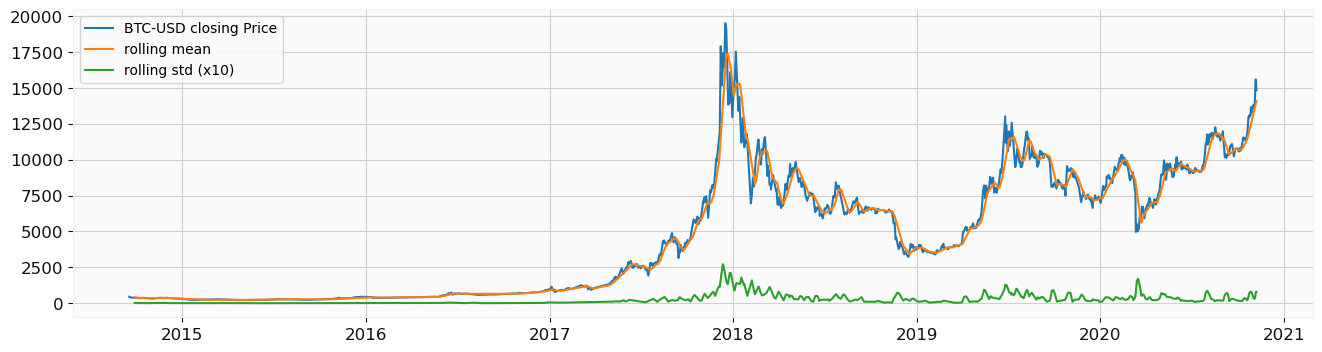

In [39]:
test_stationarity( btc['Close'], 'BTC-USD closing Price')

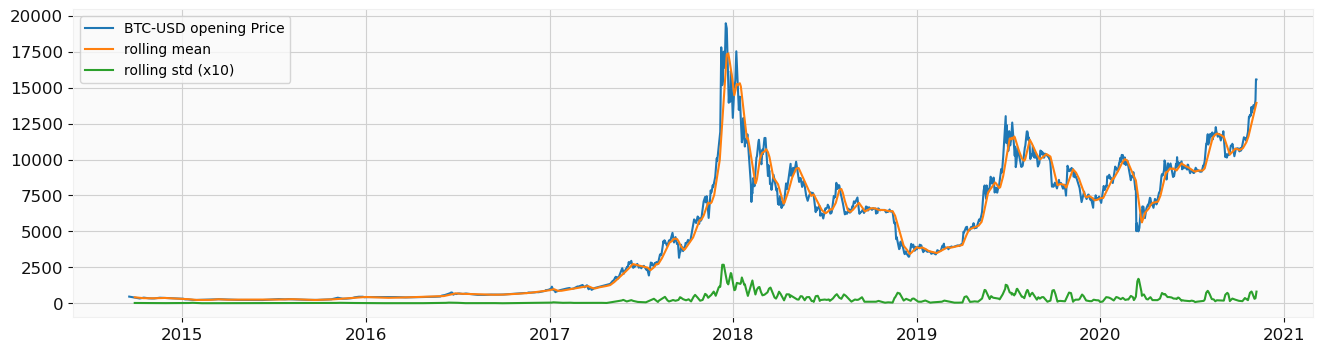

In [40]:
test_stationarity( btc['Open'], 'BTC-USD opening Price')

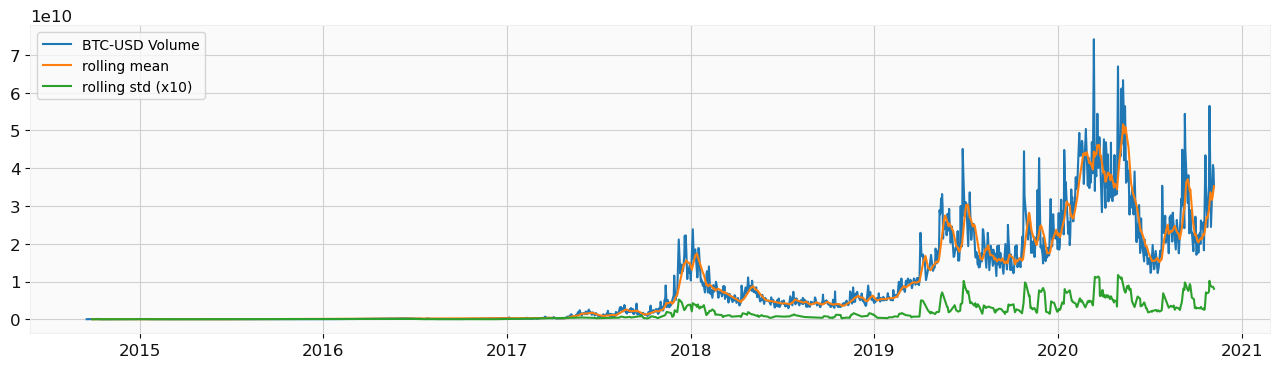

In [41]:
test_stationarity( btc['Volume'], 'BTC-USD Volume')

##  #5 different models to get predictions

https://www.bounteous.com/insights/2020/09/15/forecasting-time-series-model-using-python-part-two/

https://github.com/Bounteous-Inc/Time-Series-Prediction/blob/master/Time%20Series%20Prediction%20Temp.ipynb

## Simple Exponential Smoothing (SES)

In [57]:
btc

,Adj Close,Close,High,Low,Open,Volume,Close_diff,Close_log,Close_log_diff
Date,,,,,,,,,
2014-09-17,457.33401489,457.33401489,468.17401123,452.42199707,465.86401367,21056800,nan,6.12541401,nan
2014-09-18,424.44000244,424.44000244,456.85998535,413.10400391,456.85998535,34483200,nan,6.05077066,-0.07464335
2014-09-19,394.79598999,394.79598999,427.83499146,384.53201294,424.10299683,37919700,nan,5.97836915,-0.07240151
2014-09-20,408.90399170,408.90399170,423.29598999,389.88299561,394.67300415,36863600,nan,6.01348039,0.03511124
2014-09-21,398.82101440,398.82101440,412.42599487,393.18099976,408.08499146,26580100,nan,5.98851273,-0.02496766
...,...,...,...,...,...,...,...,...,...
2020-11-03,13950.30078125,13950.30078125,13984.98144531,13325.44140625,13550.45117188,29869951617,296.08203125,9.54325635,0.02907842
2020-11-04,14133.70703125,14133.70703125,14218.76660156,13580.47167969,13950.48828125,35116364961,862.42187500,9.55631779,0.01306144
2020-11-05,15579.84863281,15579.84863281,15706.40429688,14102.08886719,14133.73339844,40856321438,2141.96582031,9.65373360,0.09741581


In [58]:
# we choose to  resample values weekly since 2015
y = btc.Open['2015':].resample('W-MON').mean()
y

Date
2015-01-05     299.11800537
2015-01-12     280.75185721
2015-01-19     213.80143084
2015-01-26     231.32214355
2015-02-02     238.91957310
                  ...      
2020-10-12   10967.21595982
2020-10-19   11440.04882812
2020-10-26   12643.29645647
2020-11-02   13500.45563616
2020-11-09   14556.05664062
Freq: W-MON, Name: Open, Length: 306, dtype: float64

In [60]:
y[y.index> "2020"]

Date
2020-01-06    7263.22719029
2020-01-13    8039.49225725
2020-01-20    8725.32247489
2020-01-27    8555.89397321
2020-02-03    9310.74093192
2020-02-10    9656.08663504
2020-02-17   10104.76967076
2020-02-24    9764.10644531
2020-03-02    8919.66587612
2020-03-09    8804.78236607
2020-03-16    6417.57972935
2020-03-23    5698.60232980
2020-03-30    6458.33377511
2020-04-06    6665.86697824
2020-04-13    7112.26199777
2020-04-20    6997.99107143
2020-04-27    7302.10763114
2020-05-04    8546.07882254
2020-05-11    9329.42020089
2020-05-18    9257.89411272
2020-05-25    9319.84584263
2020-06-01    9294.69893973
2020-06-08    9747.25362723
2020-06-15    9586.22460938
2020-06-22    9400.38769531
2020-06-29    9315.38030134
2020-07-06    9138.67466518
2020-07-13    9299.90066964
2020-07-20    9185.82910156
2020-07-27    9539.31263951
2020-08-03   11180.79492188
2020-08-10   11568.98967634
2020-08-17   11739.76422991
2020-08-24   11830.16713170
2020-08-31   11530.63755580
2020-09-07   10

In [61]:
# splitting dataset with a validation set for 2020 values
y_to_train = y[:'2020-01-06 '] # dataset to train
y_to_val = y['2020-01-06':] # last X months for test  
predict_date = len(y) - len(y[:'2020-01-06']) # the number of data points for the test set

In [62]:
import numpy as np
from statsmodels.tsa.api import SimpleExpSmoothing 

def ses(y, y_to_train,y_to_test,smoothing_level,predict_date):
    y.plot(marker='o', color='black', legend=True, figsize=(14, 7))
    
    fit1 = SimpleExpSmoothing(y_to_train).fit(smoothing_level=smoothing_level,optimized=False)
    fcast1 = fit1.forecast(predict_date).rename(r'$\alpha={}$'.format(smoothing_level))
    # specific smoothing level
    fcast1.plot(marker='o', color='blue', legend=True)
    fit1.fittedvalues.plot(marker='o',  color='blue')
    mse1 = ((fcast1 - y_to_test) ** 2).mean()
    print('The Root Mean Squared Error of our forecasts with smoothing level of {} is {}'.format(smoothing_level,round(np.sqrt(mse1), 2)))
    
    ## auto optimization
    fit2 = SimpleExpSmoothing(y_to_train).fit()
    fcast2 = fit2.forecast(predict_date).rename(r'$\alpha=%s$'%fit2.model.params['smoothing_level'])
    # plot
    fcast2.plot(marker='o', color='green', legend=True)
    fit2.fittedvalues.plot(marker='o', color='green')
    
    mse2 = ((fcast2 - y_to_test) ** 2).mean()
    print('The Root Mean Squared Error of our forecasts with auto optimization is {}'.format(round(np.sqrt(mse2), 2)))
    
    plt.show()

The Root Mean Squared Error of our forecasts with smoothing level of 0.8 is 3000.28
The Root Mean Squared Error of our forecasts with auto optimization is 3003.91


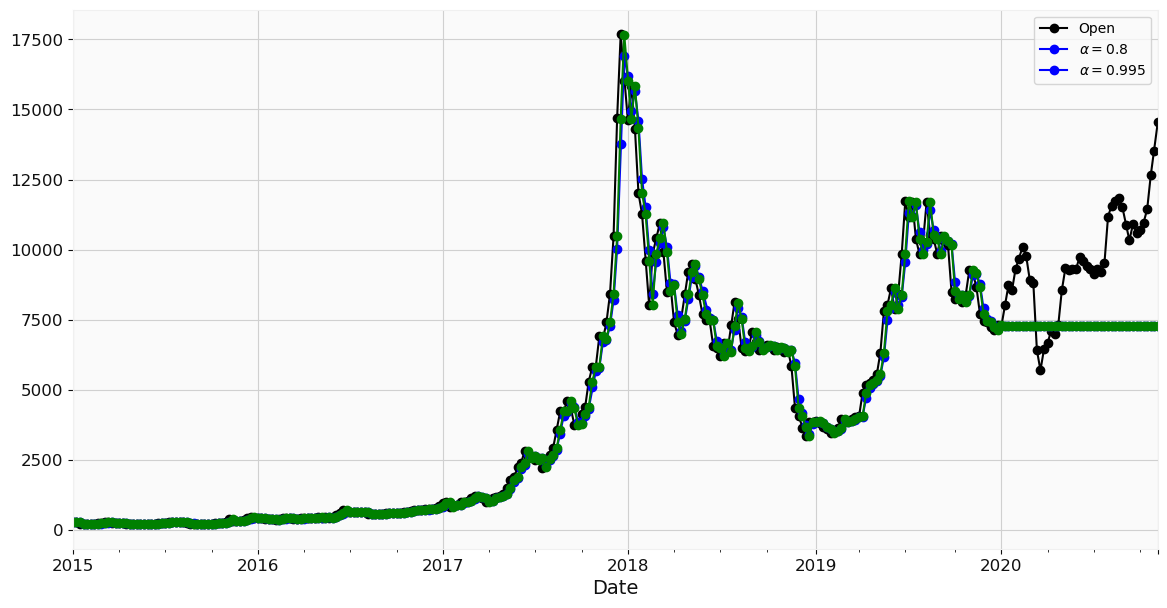

In [63]:
ses(y, y_to_train,y_to_val,0.8,predict_date)

## Holt’s Linear Trend Method

In [64]:
from statsmodels.tsa.api import Holt

def holt(y,y_to_train,y_to_test,smoothing_level,smoothing_slope, predict_date):
    y.plot(marker='o', color='black', legend=True, figsize=(14, 7))
    
    fit1 = Holt(y_to_train).fit(smoothing_level, smoothing_slope, optimized=False)
    fcast1 = fit1.forecast(predict_date).rename("Holt's linear trend")
    mse1 = ((fcast1 - y_to_test) ** 2).mean()
    print('The Root Mean Squared Error of Holt''s Linear trend {}'.format(round(np.sqrt(mse1), 2)))

    fit2 = Holt(y_to_train, exponential=True).fit(smoothing_level, smoothing_slope, optimized=False)
    fcast2 = fit2.forecast(predict_date).rename("Exponential trend")
    mse2 = ((fcast2 - y_to_test) ** 2).mean()
    print('The Root Mean Squared Error of Holt''s Exponential trend {}'.format(round(np.sqrt(mse2), 2)))
    
    fit1.fittedvalues.plot(marker="o", color='blue')
    fcast1.plot(color='blue', marker="o", legend=True)
    fit2.fittedvalues.plot(marker="o", color='red')
    fcast2.plot(color='red', marker="o", legend=True)

    plt.show()

The Root Mean Squared Error of Holts Linear trend 6017.11
The Root Mean Squared Error of Holts Exponential trend 5084.22


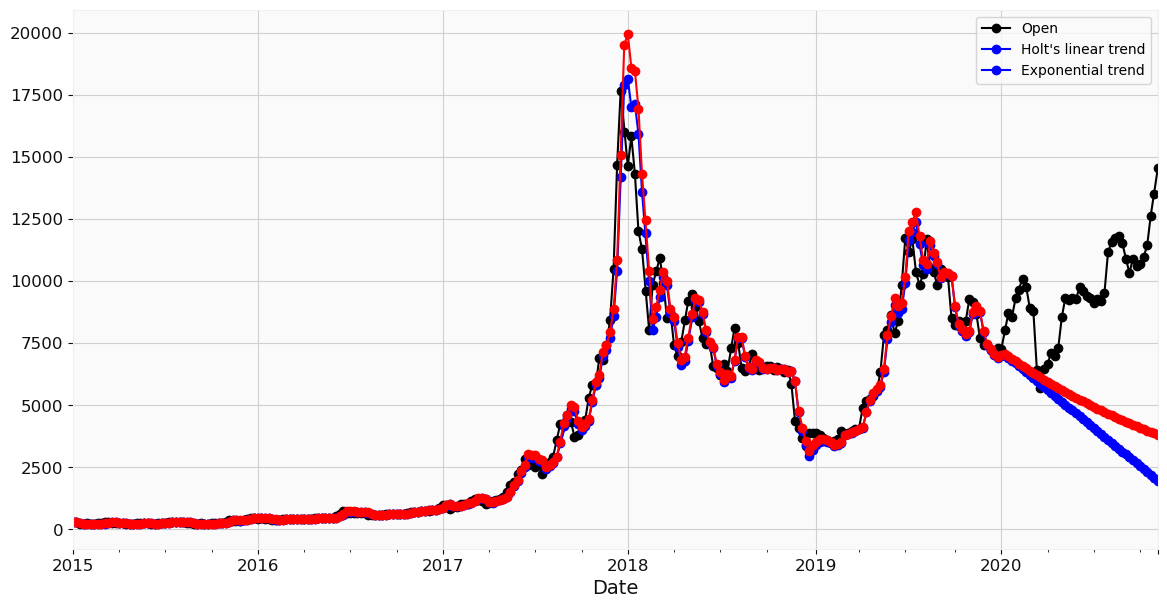

In [65]:
holt(y, y_to_train,y_to_val,0.6,0.2,predict_date)


## Holt-Winters’ Seasonal Method

In [66]:
from statsmodels.tsa.api import ExponentialSmoothing

def holt_win_sea(y,y_to_train,y_to_test,seasonal_type,seasonal_period,predict_date):
    
    y.plot(marker='o', color='black', legend=True, figsize=(14, 7))
    
    if seasonal_type == 'additive':
        fit1 = ExponentialSmoothing(y_to_train, seasonal_periods = seasonal_period, trend='add', seasonal='add').fit(use_boxcox=True)
        fcast1 = fit1.forecast(predict_date).rename('Additive')
        mse1 = ((fcast1 - y_to_test) ** 2).mean()
        print('The Root Mean Squared Error of additive trend, additive seasonal of '+ 
              'period season_length={} and a Box-Cox transformation {}'.format(seasonal_period,round(np.sqrt(mse1), 2)))
        
        fit2 = ExponentialSmoothing(y_to_train, seasonal_periods = seasonal_period, trend='add', seasonal='add', damped=True).fit(use_boxcox=True)
        fcast2 = fit2.forecast(predict_date).rename('Additive+damped')
        mse2 = ((fcast2 - y_to_test) ** 2).mean()
        print('The Root Mean Squared Error of additive damped trend, additive seasonal of '+ 
              'period season_length={} and a Box-Cox transformation {}'.format(seasonal_period,round(np.sqrt(mse2), 2)))
        
        fit1.fittedvalues.plot(style='--', color='red')
        fcast1.plot(style='--', marker='o', color='red', legend=True)
        fit2.fittedvalues.plot(style='--', color='green')
        fcast2.plot(style='--', marker='o', color='green', legend=True)
    
    elif seasonal_type == 'multiplicative':  
        fit3 = ExponentialSmoothing(y_to_train, seasonal_periods = seasonal_period, trend='add', seasonal='mul').fit(use_boxcox=True)
        fcast3 = fit3.forecast(predict_date).rename('Multiplicative')
        mse3 = ((fcast3 - y_to_test) ** 2).mean()
        print('The Root Mean Squared Error of additive trend, multiplicative seasonal of '+ 
              'period season_length={} and a Box-Cox transformation {}'.format(seasonal_period,round(np.sqrt(mse3), 2)))
        
        fit4 = ExponentialSmoothing(y_to_train, seasonal_periods = seasonal_period, trend='add', seasonal='mul', damped=True).fit(use_boxcox=True)
        fcast4 = fit4.forecast(predict_date).rename('Multiplicative+damped')
        mse4 = ((fcast3 - y_to_test) ** 2).mean()
        print('The Root Mean Squared Error of additive damped trend, multiplicative seasonal of '+ 
              'period season_length={} and a Box-Cox transformation {}'.format(seasonal_period,round(np.sqrt(mse4), 2)))
        
        fit3.fittedvalues.plot(style='--', color='red')
        fcast3.plot(style='--', marker='o', color='red', legend=True)
        fit4.fittedvalues.plot(style='--', color='green')
        fcast4.plot(style='--', marker='o', color='green', legend=True)
        
    else:
        print('Wrong Seasonal Type. Please choose between additive and multiplicative')

    plt.show()

The Root Mean Squared Error of additive trend, additive seasonal of period season_length=52 and a Box-Cox transformation 1716.55
The Root Mean Squared Error of additive damped trend, additive seasonal of period season_length=52 and a Box-Cox transformation 3671.4


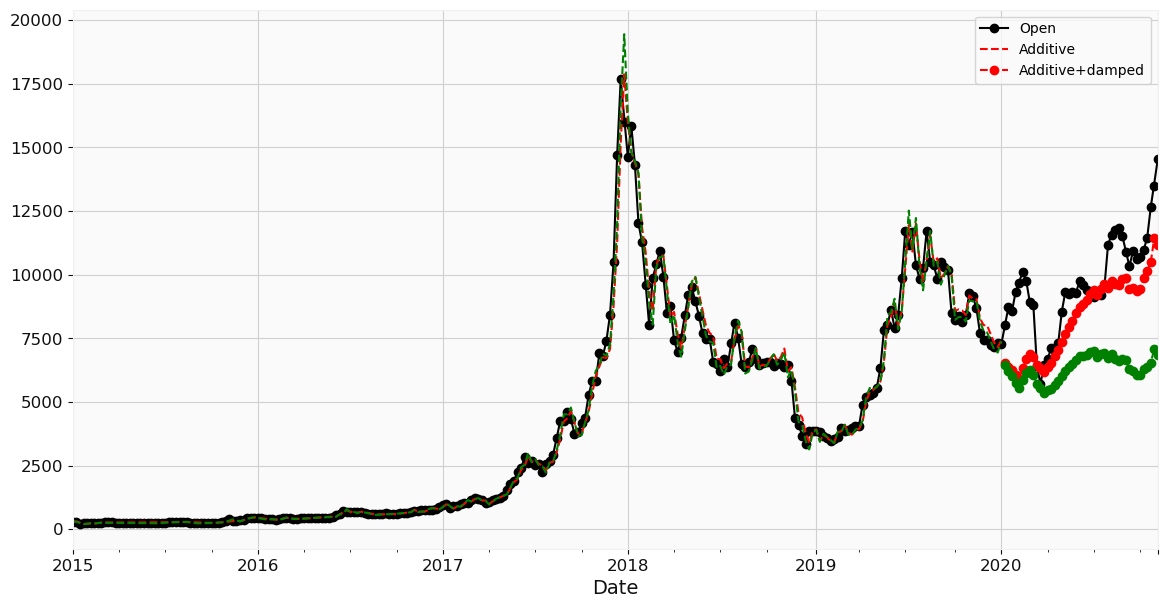

In [67]:
holt_win_sea(y, y_to_train,y_to_val,'additive',52, predict_date)

In [ ]:
y

## SARIMA  MODEL
https://www.bounteous.com/insights/2020/09/15/forecasting-time-series-model-using-python-part-two/

In [68]:

def sarima_grid_search(y,seasonal_period):
    p = d = q = range(0, 2)
    pdq = list(itertools.product(p, d, q))
    seasonal_pdq = [(x[0], x[1], x[2],seasonal_period) for x in list(itertools.product(p, d, q))]
    
    mini = float('+inf')
    
    
    for param in pdq:
        for param_seasonal in seasonal_pdq:
            try:
                mod = sm.tsa.statespace.SARIMAX(y,
                                                order=param,
                                                seasonal_order=param_seasonal,
                                                enforce_stationarity=False,
                                                enforce_invertibility=False)

                results = mod.fit()
                
                if results.aic < mini:
                    mini = results.aic
                    param_mini = param
                    param_seasonal_mini = param_seasonal

                print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
            except:
                continue
    print(f'The set of parameters with the minimum AIC is: SARIMA{param_mini}x{param_seasonal_mini} - AIC:{mini}')

In [ ]:
sarima_grid_search(y,52)

In [ ]:
# below are the best pameters as caluclated by the "sarima_grid_search" function
# The set of parameters with the minimum AIC is: SARIMA(0, 1, 1)x(1, 1, 1, 52) - AIC:3208.9162803575964

In [69]:
# Call this function after pick the right(p,d,q) for SARIMA based on AIC               
def sarima_eva(y,order,seasonal_order,seasonal_period,pred_date,y_to_test):
    # fit the model 
    mod = sm.tsa.statespace.SARIMAX(y,
                                order=order,
                                seasonal_order=seasonal_order,
                                enforce_stationarity=False,
                                enforce_invertibility=False)

    results = mod.fit()
    print(results.summary().tables[1])
    
    results.plot_diagnostics(figsize=(16, 8))
    plt.show()
    
    # The dynamic=False argument ensures that we produce one-step ahead forecasts, 
    # meaning that forecasts at each point are generated using the full history up to that point.
    pred = results.get_prediction(start=pd.to_datetime(pred_date), dynamic=False)
    pred_ci = pred.conf_int()
    y_forecasted = pred.predicted_mean
    mse = ((y_forecasted - y_to_test) ** 2).mean()
    print('The Root Mean Squared Error of SARIMA with season_length={} and dynamic = False {}'.format(seasonal_period,round(np.sqrt(mse), 2)))

    ax = y.plot(label='observed')
    y_forecasted.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
    ax.fill_between(pred_ci.index,
                    pred_ci.iloc[:, 0],
                    pred_ci.iloc[:, 1], color='k', alpha=.2)

    ax.set_xlabel('Date')
    ax.set_ylabel('Sessions')
    plt.legend()
    plt.show()

    # A better representation of our true predictive power can be obtained using dynamic forecasts. 
    # In this case, we only use information from the time series up to a certain point, 
    # and after that, forecasts are generated using values from previous forecasted time points.
    pred_dynamic = results.get_prediction(start=pd.to_datetime(pred_date), dynamic=True, full_results=True)
    pred_dynamic_ci = pred_dynamic.conf_int()
    y_forecasted_dynamic = pred_dynamic.predicted_mean
    mse_dynamic = ((y_forecasted_dynamic - y_to_test) ** 2).mean()
    print('The Root Mean Squared Error of SARIMA with season_length={} and dynamic = True {}'.format(seasonal_period,round(np.sqrt(mse_dynamic), 2)))

    ax = y.plot(label='observed')
    y_forecasted_dynamic.plot(label='Dynamic Forecast', ax=ax,figsize=(14, 7))
    ax.fill_between(pred_dynamic_ci.index,
                    pred_dynamic_ci.iloc[:, 0],
                    pred_dynamic_ci.iloc[:, 1], color='k', alpha=.2)

    ax.set_xlabel('Date')
    ax.set_ylabel('Sessions')

    plt.legend()
    plt.show()
    
    return (results)

In [ ]:
y[y.index> "2020"]

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.3543      0.052      6.758      0.000       0.252       0.457
ar.S.L52      -0.2221      0.100     -2.220      0.026      -0.418      -0.026
ma.S.L52      -1.0010      0.075    -13.413      0.000      -1.147      -0.855
sigma2      4.311e+05   1.73e-07   2.49e+12      0.000    4.31e+05    4.31e+05


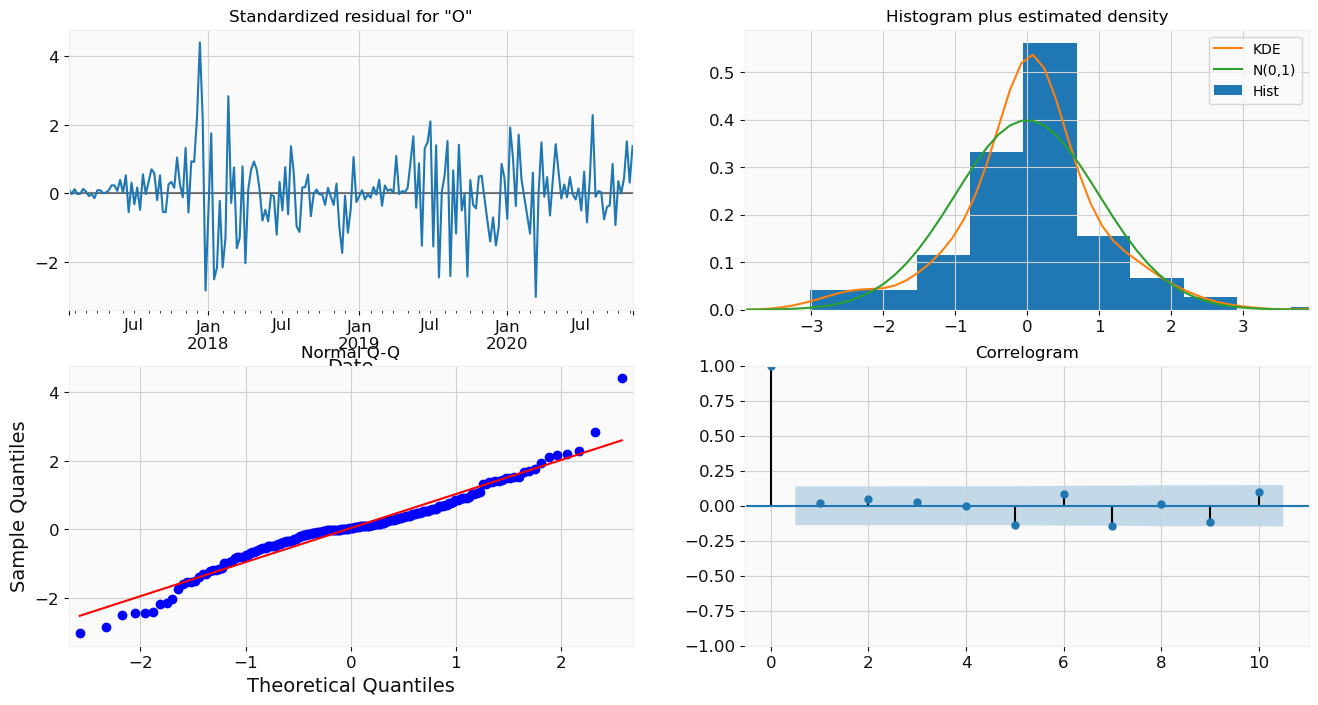

The Root Mean Squared Error of SARIMA with season_length=52 and dynamic = False 677.0


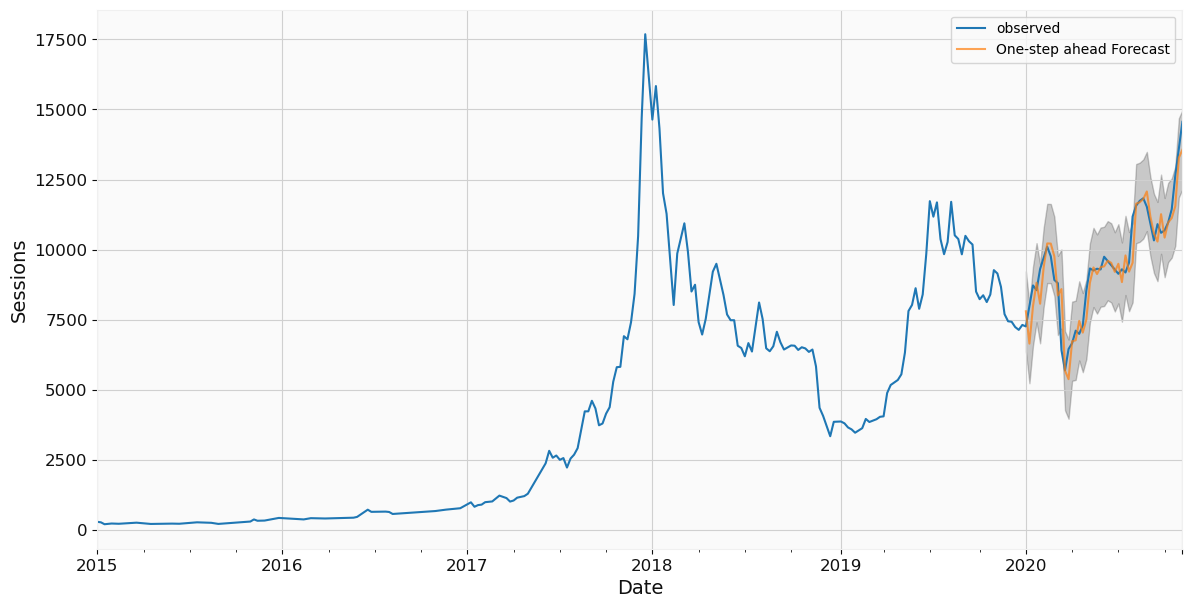

The Root Mean Squared Error of SARIMA with season_length=52 and dynamic = True 3776.86


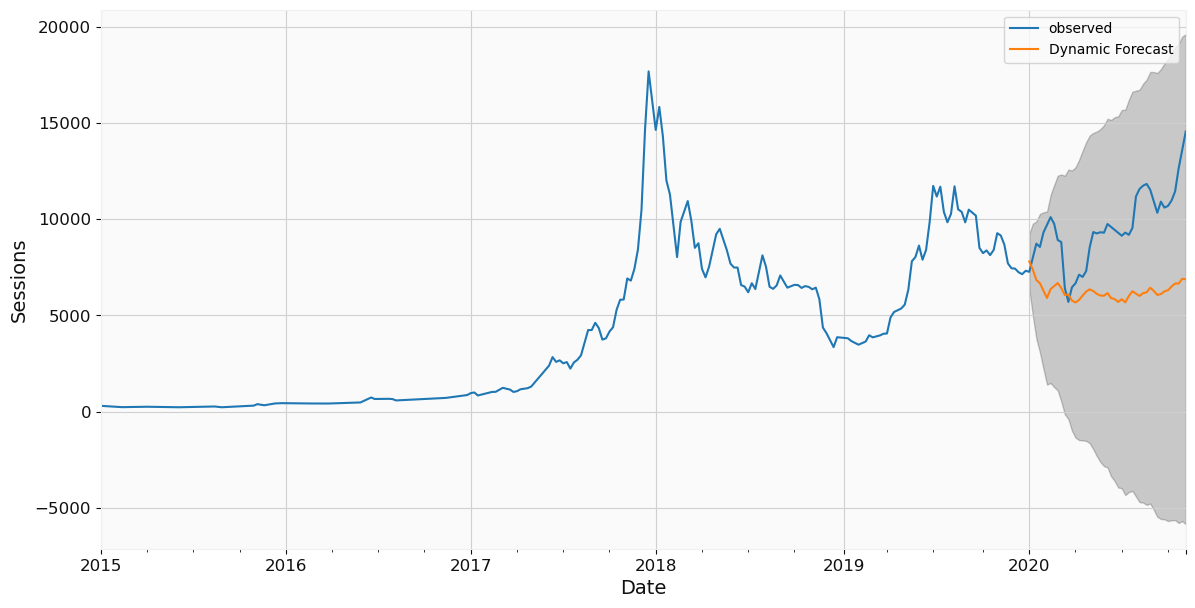

In [70]:
# here we type the "sarima_grid_search" output as parameters for our model
model = sarima_eva(y,(0, 1, 1),(1, 1, 1, 52),52,'2020-01-06',y_to_val)

In [71]:
def forecast(model,predict_steps,y):
    
    pred_uc = model.get_forecast(steps=predict_steps)

    #SARIMAXResults.conf_int, can change alpha,the default alpha = .05 returns a 95% confidence interval.
    pred_ci = pred_uc.conf_int()

    ax = y.plot(label='observed', figsize=(14, 7))
#     print(pred_uc.predicted_mean)
    pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
    ax.fill_between(pred_ci.index,
                    pred_ci.iloc[:, 0],
                    pred_ci.iloc[:, 1], color='k', alpha=.25)
    ax.set_xlabel('Date')
    ax.set_ylabel(y.name)

    plt.legend()
    plt.show()
    
    # Produce the forcasted tables 
    pm = pred_uc.predicted_mean.reset_index()
    pm.columns = ['Date','Predicted_Mean']
    pci = pred_ci.reset_index()
    pci.columns = ['Date','Lower Bound','Upper Bound']
    final_table = pm.join(pci.set_index('Date'), on='Date')
    
    return (final_table)

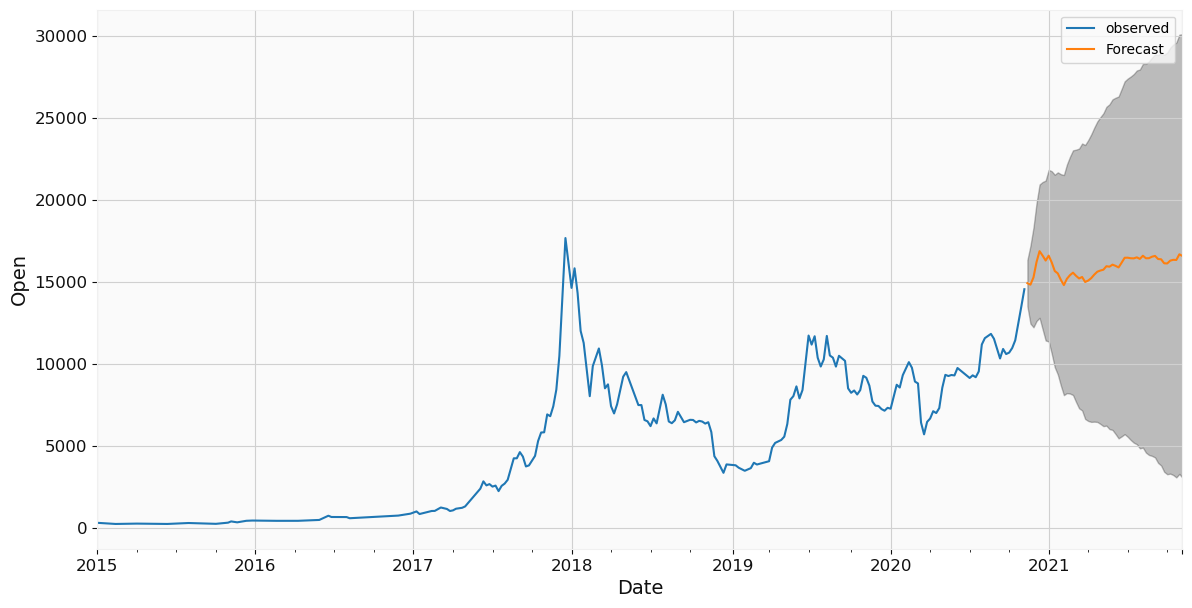

,Date,Predicted_Mean,Lower Bound,Upper Bound
0,2020-11-16,14926.27257520,13514.67948134,16337.86566907
1,2020-11-23,14832.53662536,12458.99110911,17206.08214162
2,2020-11-30,15275.76826701,12230.93197275,18320.60456127
3,2020-12-07,16209.67074180,12616.84496650,19802.49651711
4,2020-12-14,16877.37296572,12809.72488328,20945.02104815


In [72]:

final_table = forecast(model,52,y)
final_table.head()

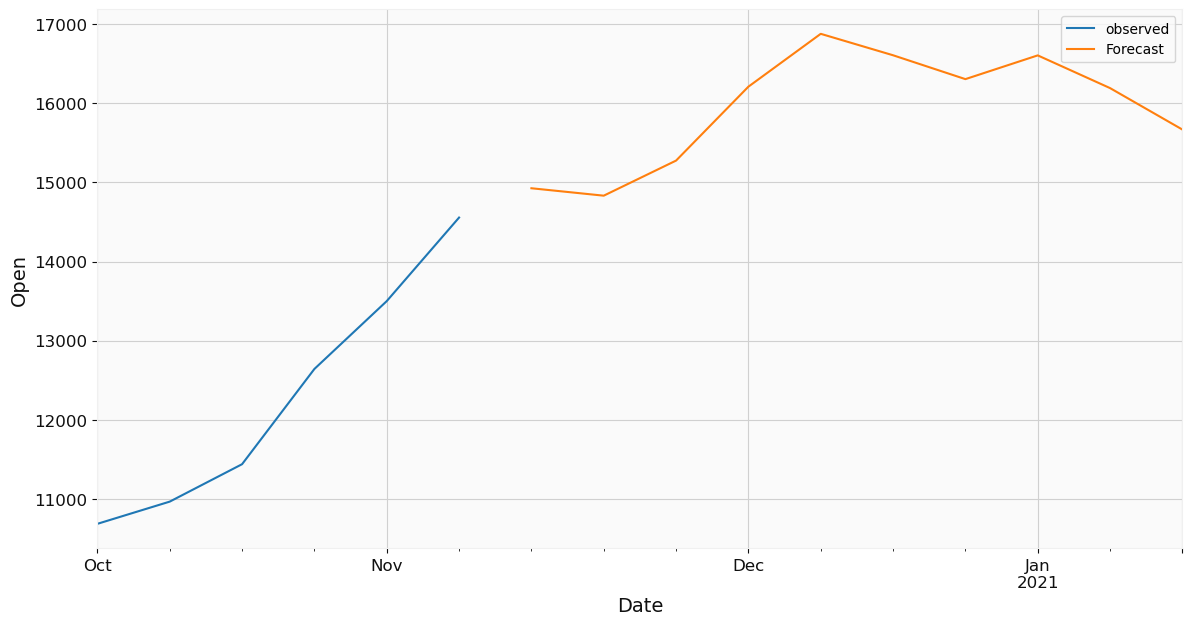

In [73]:
### Graphs without the confident interval 
pred_uc = model.get_forecast(steps=10)
ax = y["2020-10-01":].plot(label='observed', figsize=(14, 7))
#     print(pred_uc.predicted_mean)
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.set_xlabel('Date')
ax.set_ylabel(y.name)

plt.legend()
plt.show()

In [ ]:
plt.savefig(path_data + 'btcusd-oct20_jan20.pdf')

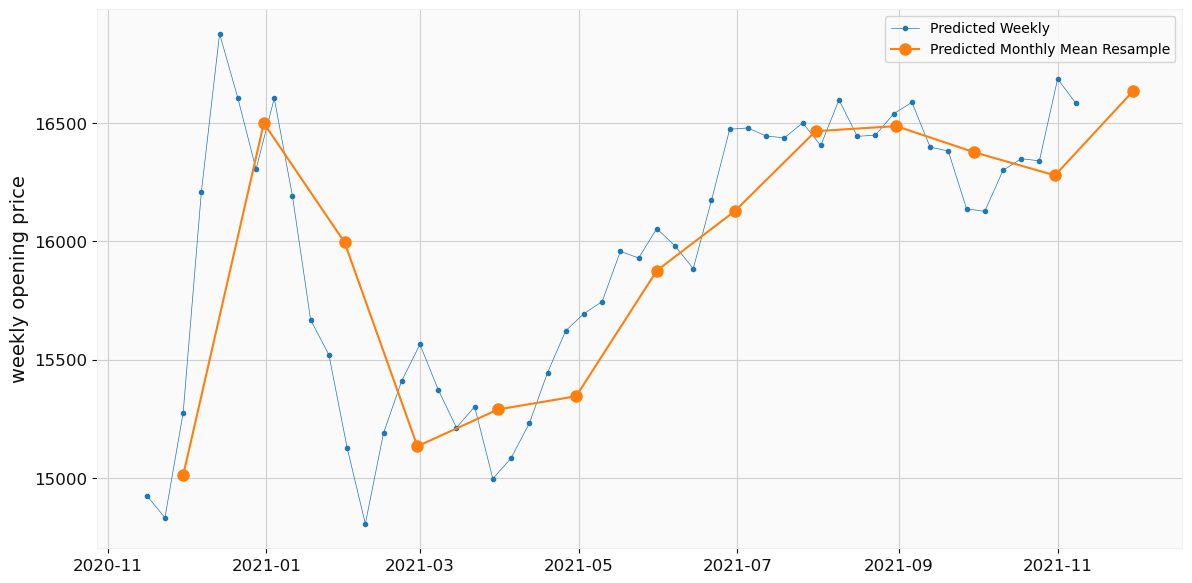

In [74]:
### Graphs show only the perdiected period
final_table.index = final_table.Date
fig, ax = plt.subplots( figsize=(14, 7))
# ax.plot(y,marker='.', linestyle='-', linewidth=0.5, label='Weekly')
ax.plot(final_table.Predicted_Mean,marker='.', linestyle='-', linewidth=0.5, label='Predicted Weekly')
# ax.plot(y.resample('M').mean(),marker='o', markersize=8, linestyle='-', label='Monthly Mean Resample')
ax.plot(final_table.Predicted_Mean.resample('M').mean(),marker='o', markersize=8, linestyle='-', label='Predicted Monthly Mean Resample')
ax.set_ylabel('weekly opening price')
ax.legend();

In [ ]:
fig.savefig(path_data + 'btcusd.png')